In [342]:
import pandas as pd
from datetime import datetime, date, time
from collections import defaultdict
path = r"d:\Загрузки\part1.csv"
# %matplotlib notebook
df = pd.read_csv(path)
df = df.sort_values(by='starts_at')
df.reset_index(inplace=True, drop=True)

In [353]:
df['collection_day'] = pd.to_datetime(df['collection_day'])
df['starts_at'] = pd.to_datetime(df['starts_at'])
df['completed_at'] = pd.to_datetime(df['completed_at'])
cathegory_groups = df.groupby("category")

In [394]:
df.head()

,Unnamed: 0,department,product_name,quantity,category,package_type,not_found,store_id,stock,brand,collection_day,product_id,city,promotion_price,regular_price,completed_at,starts_at,order_identifier,shopper_login,Y_predicted
0,3181857,МОЛОЧНЫЕ,"1Л УП/МОЛОКО RIOBA 3,5% БЗМЖ",1,МОЛОКО,ШТУКА,0,14,1525.0,RIOBA,2017-01-09,9959.0,1,NaN,57.950,2017-01-09 07:26:00,2017-01-09 11:00:00,338528,NaN,0.091244
1,2580128,КОСМЕТИКА,24ШТ ARO Т\БУМАГА 120ГР ВТУЛКА,1,БУМАЖНАЯ И ВАТНАЯ ПРОДУКЦИЯ,УПАКОВКА,0,14,26.0,ARO,2017-01-09,10055.0,1,NaN,113.516,2017-01-09 07:26:00,2017-01-09 11:00:00,338528,NaN,0.059773
2,2579844,КОСМЕТИКА,20ШТ FL ВЛ.САЛФ Д/ИНТИМ.ГИГ,3,БУМАЖНАЯ И ВАТНАЯ ПРОДУКЦИЯ,УПАКОВКА,0,12,243.0,FINE LIFE,2017-01-09,30370.0,1,NaN,11.141,2017-01-09 05:42:00,2017-01-09 11:00:00,338513,NaN,0.059773
3,605648,ЗАМОРОЗКА,2КГ ВАРЕНИКИ С ТВОРОЖ/НАЧ. MC,1,ЗАМОРОЖЕННЫЕ ГОТОВЫЕ БЛЮДА,ШТУКА,0,14,25.0,HORECA SELECT,2017-01-09,44736.0,1,NaN,289.502,2017-01-09 07:26:00,2017-01-09 11:00:00,338528,NaN,0.124551
4,1536255,КОНСЕРВЫ,5Л НАПОЛНИТЕЛЬ ВПИТ ARO,1,УХОД ЗА ЖИВОТНЫМИ,ШТУКА,1,12,101.0,ARO,2017-01-09,63623.0,1,NaN,65.600,2017-01-09 05:42:00,2017-01-09 11:00:00,338513,NaN,0.125135


по категориям

In [374]:
predict = {}
g = None
for name, group in df.groupby("category"):
    predict[name] = group["not_found"].mean()
    

In [379]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

In [384]:
def predict_not_found(x):
    """
    x - категория
    """
    return predict[x]
    
Y_real = df["not_found"]
df["Y_predicted"] = df["category"].apply(lambda x: predict_not_found(x))
roc_auc_score(Y_real, df["Y_predicted"])

0.5965096595869761

категории по городам

In [395]:
predict = defaultdict(dict)
g = None
for city, city_group in df.groupby("city"):
    for name, category in city_group.groupby("category"):
        predict[city][name] = category["not_found"].mean()
    

In [379]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

In [412]:
df = df.drop(columns="Unnamed: 0")

In [414]:
def predict_not_found(row):
    """
    x - категория
    """
    return predict[row["city"]][row["category"]]
    
Y_real = df["not_found"]
df["Y_predicted"] = df.apply(lambda x: predict_not_found(x), axis=1)
roc_auc_score(Y_real, df["Y_predicted"])

0.6049179248295348

### Evaluation

In [417]:
df_train = pd.read_csv(r"d:\Загрузки\eval_data.csv")
df_train.head()

d:\jupyter\venv\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,department,product_name,quantity,category,package_type,store_id,stock,brand,collection_day,product_id,city,promotion_price,regular_price,completed_at,starts_at,order_identifier,shopper_login
0,0,ТОРГОВОЕ ОБОРУДОВАНИЕ,БАТ. DURACELL AA BASIC 6ШТ,1,Батареи/заряд. устр-ва/фонари,КОРОБКА,1,391.00,DURACELL,2019-01-18 00:00:00,104473.0,1,NaN,234.854,2019-01-18 11:53:00,2019-01-18 17:00:00,1159085,sppulk_sb1
1,1,НОME EQUIPMENT,ФЛЕШКА CR FIT 16GB SANDISK,1,Хранение данных,ШТУКА,1,3.00,SANDISK,2019-01-18 00:00:00,5479826.0,1,NaN,370.583,2019-01-18 11:53:00,2019-01-18 17:00:00,1159085,sppulk_sb1
2,2,ФРУКТЫ И ОВОЩИ,МАНДАРИНЫ С ЛИСТОЧКОМ ВЕС,3,ФРУКТЫ,КИЛОГРАММ,1,0.00,NaN,2019-01-18 00:00:00,3497479.0,1,NaN,55.565,2019-01-18 11:53:00,2019-01-18 17:00:00,1159085,sppulk_sb1
3,3,ФРУКТЫ И ОВОЩИ,БАНАНЫ ВЕС,2,ФРУКТЫ,КИЛОГРАММ,1,0.00,NaN,2019-01-18 00:00:00,86174.0,1,55.565,55.565,2019-01-18 11:53:00,2019-01-18 17:00:00,1159085,sppulk_sb1
4,4,ФРУКТЫ И ОВОЩИ,ЯБЛОКИ СИМИРЕНКО (ПАКЕТ),1,ФРУКТЫ,КИЛОГРАММ,1,15.77,NO BRAND,2019-01-18 00:00:00,13322.0,1,NaN,72.818,2019-01-18 11:53:00,2019-01-18 17:00:00,1159085,sppulk_sb1


In [421]:
def predict_not_found(row):
    """
    x - категория
    """
    if row["category"] not in predict[row["city"]].keys():
        return 0
    return predict[row["city"]][row["category"]]

df_train["Y_predicted"] = df_train.apply(lambda x: predict_not_found(x), axis=1)

In [445]:
df_proba = df_train[["Unnamed: 0", "Y_predicted"]]

df_proba['id'] = df_proba["Unnamed: 0"]
df_proba['forecast'] = df_proba["Y_predicted"].round()

df_proba[["id","forecast"]].to_csv("statistic.csv", index=False)



d:\jupyter\venv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
d:\jupyter\venv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [446]:
pd.read_csv(r"d:\Jupyter\Notebooks_Skoltech\statistic.csv")

,id,forecast
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
...,...,...
1239867,1239867,0.0
1239868,1239868,0.0
1239869,1239869,0.0
1239870,1239870,0.0


In [125]:
# id магазинов
print(df["store_id"].unique())
for idd in df["store_id"].unique():
    s = df[df["store_id"] == idd].size
    print(f"for store with id {idd} rows exist = {s}")

[ 21   3  12   2  14   9  11   1  10   8  63  62  67  65  66  68  84  85
  86  87  88  93  89  91  90  96  97  95 103 102 104 107 108 116 109 122
 127]
for store with id 21 rows exist = 6143517
for store with id 3 rows exist = 3757554
for store with id 12 rows exist = 5896707
for store with id 2 rows exist = 7161537
for store with id 14 rows exist = 7120345
for store with id 9 rows exist = 2714435
for store with id 11 rows exist = 4492379
for store with id 1 rows exist = 5657991
for store with id 10 rows exist = 4780533
for store with id 8 rows exist = 5560198
for store with id 63 rows exist = 957125
for store with id 62 rows exist = 1671582
for store with id 67 rows exist = 1035215
for store with id 65 rows exist = 1712280
for store with id 66 rows exist = 466507
for store with id 68 rows exist = 1524807
for store with id 84 rows exist = 421705
for store with id 85 rows exist = 693291
for store with id 86 rows exist = 655291
for store with id 87 rows exist = 961381
for store with id 8

In [190]:
df[df["store_id"] == 21]

,Unnamed: 0,department,product_name,quantity,category,package_type,not_found,store_id,stock,brand,collection_day,product_id,city,promotion_price,regular_price,completed_at,starts_at,order_identifier,shopper_login
0,2145959,КОСМЕТИКА,"1000Ш RIOB ТРУБ Д/КОКТ Д=0,5СМ",1,ОДНОРАЗОВЫЕ ПРИНАДЛЕЖНОСТИ,ШТУКА,0,21,19.00,RIOBA,2017-01-09 00:00:00,8860.0,1,NaN,299.222,2017-01-09 13:19:00,2017-01-09 20:00:00,338801,NaN
28,541996,ДЕЛИКАТЕСЫ И СЫР,250Г СЫР РИКОТТА 45% UNAGRANDE,1,ПРОЧИЕ МЯГКИЕ СЫРЫ,ШТУКА,0,21,3.00,UNАGRANDE,2017-01-09 00:00:00,14593.0,1,NaN,129.140,2017-01-09 12:14:00,2017-01-09 21:00:00,338741,NaN
35,1163311,КОЛБАСНЫЕ ИЗДЕЛИЯ,150Г КАРБОНАД ЮБИЛЕЙН. В/К НАР,1,МЯСНЫЕ ДЕЛИКАТЕСЫ,ШТУКА,0,21,38.00,ОСТАНКИНО,2017-01-09 00:00:00,4873.0,1,NaN,107.630,2017-01-09 11:08:00,2017-01-09 21:00:00,338666,NaN
58,1162834,КОЛБАСНЫЕ ИЗДЕЛИЯ,~900Г КОЛБАСА ДОКТОР ПО-ЧЕРКИЗ,1,ВАРЕНАЯ КОЛБАСА,КИЛОГРАМ,1,21,3.97,ЧЕРКИЗОВО,2017-01-09 00:00:00,4456.0,1,NaN,309.959,2017-01-09 11:08:00,2017-01-09 21:00:00,338666,NaN
96,1162929,КОЛБАСНЫЕ ИЗДЕЛИЯ,СОСИСКИ ВЕНСКИЕ ИНД КРАСНОБОР,0,СОСИСКИ / САРДЕЛЬКИ,КИЛОГРАМ,1,21,4.05,КРАСНОБОР,2017-01-09 00:00:00,87015.0,1,NaN,323.864,2017-01-09 10:51:00,2017-01-09 19:00:00,338617,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999971,2944704,МОЛОЧНЫЕ,"1Л УП/МОЛОКО PARMALAT 3,5% БЗМ",30,МОЛОКО,ШТУКА,0,21,5679.00,PARMALAT,2019-01-06 00:00:00,158.0,1,NaN,72.026,2018-12-24 10:49:00,2019-01-06 10:00:00,1894921,3434
3999991,2146095,КОСМЕТИКА,100ШТ FINE LIFE САЛФ УНИВ 3СЛ,5,БУМАЖНАЯ И ВАТНАЯ ПРОДУКЦИЯ,ШТУКА,0,21,545.00,FINE LIFE,2019-01-10 00:00:00,24872.0,1,NaN,60.281,2018-12-28 10:50:00,2019-01-10 11:00:00,1938292,3221
3999993,2146077,КОСМЕТИКА,8Р ZEWA Т/БУМ DELUX 3СЛ ПЕРСИК,2,БУМАЖНАЯ И ВАТНАЯ ПРОДУКЦИЯ,УПАКОВКА,0,21,1816.00,ZEWA,2019-01-10 00:00:00,7373.0,1,107.387,152.387,2018-12-28 10:50:00,2019-01-10 11:00:00,1938292,3221
3999994,2146076,КОСМЕТИКА,90ШТ ZEWA ПЛАТКИ КОРОБК FAMILY,5,БУМАЖНАЯ И ВАТНАЯ ПРОДУКЦИЯ,ШТУКА,1,21,131.00,ZEWA,2019-01-10 00:00:00,7391.0,1,77.390,90.143,2018-12-28 10:50:00,2019-01-10 11:00:00,1938292,3221


d:\jupyter\venv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


<IPython.core.display.Javascript object>


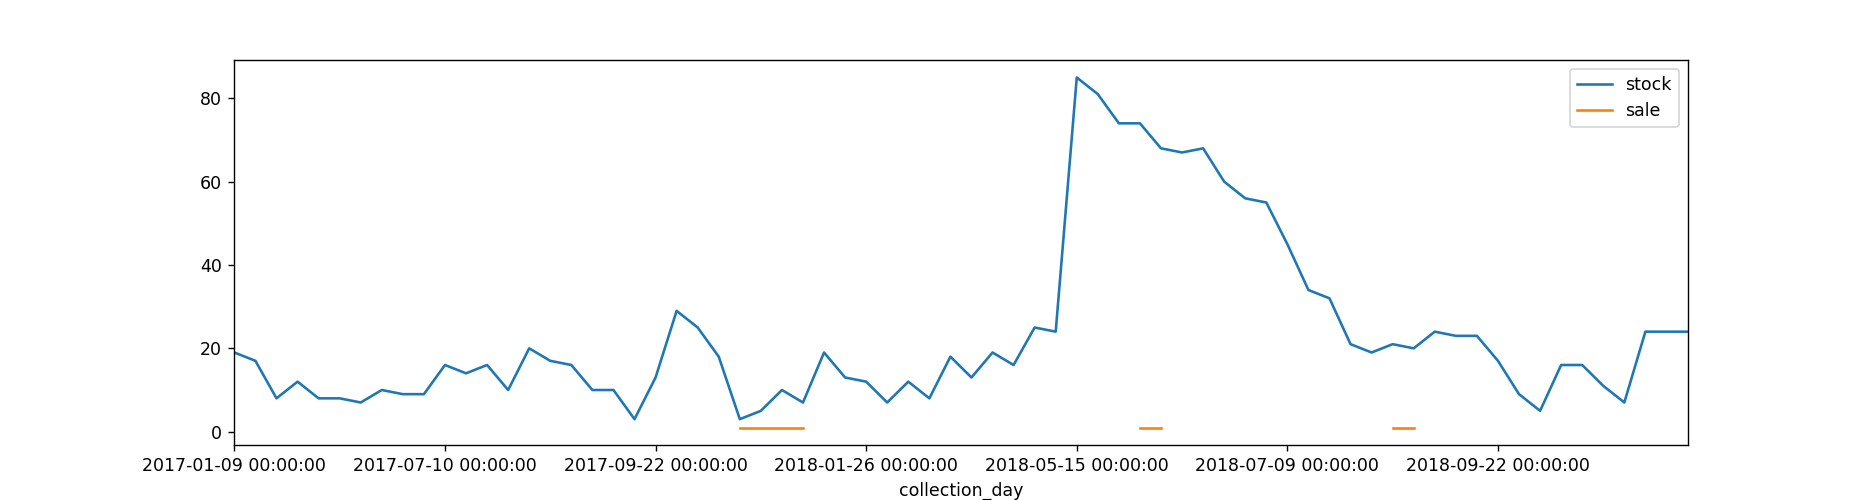

In [187]:
df_21 = df[df["store_id"] == 21].reset_index(drop=True)
df_21_8860 = df_21[df_21["product_id"] == 8860.0].reset_index(drop=True)
df_21_8860["sale"] = df_21_8860["promotion_price"].notna()
df_21_8860["sale"] = df_21_8860["sale"].astype(np.int32)
df_21_8860["sale"][df_21_8860["sale"] == 0] = None
# df_21_8860_prom = df_21_8860[df_21_8860["promotion_price"].notna()]
# df_21_8860_prom.reset_index(inplace=True, drop=True)

# df_21_8860_reg = df_21_8860[df_21_8860["promotion_price"].isna()]
# df_21_8860_reg.reset_index(inplace=True, drop=True)

df_21_8860.plot(figsize=(15,4), x="collection_day", y=["stock", "sale"], label="")

d:\jupyter\venv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


<IPython.core.display.Javascript object>


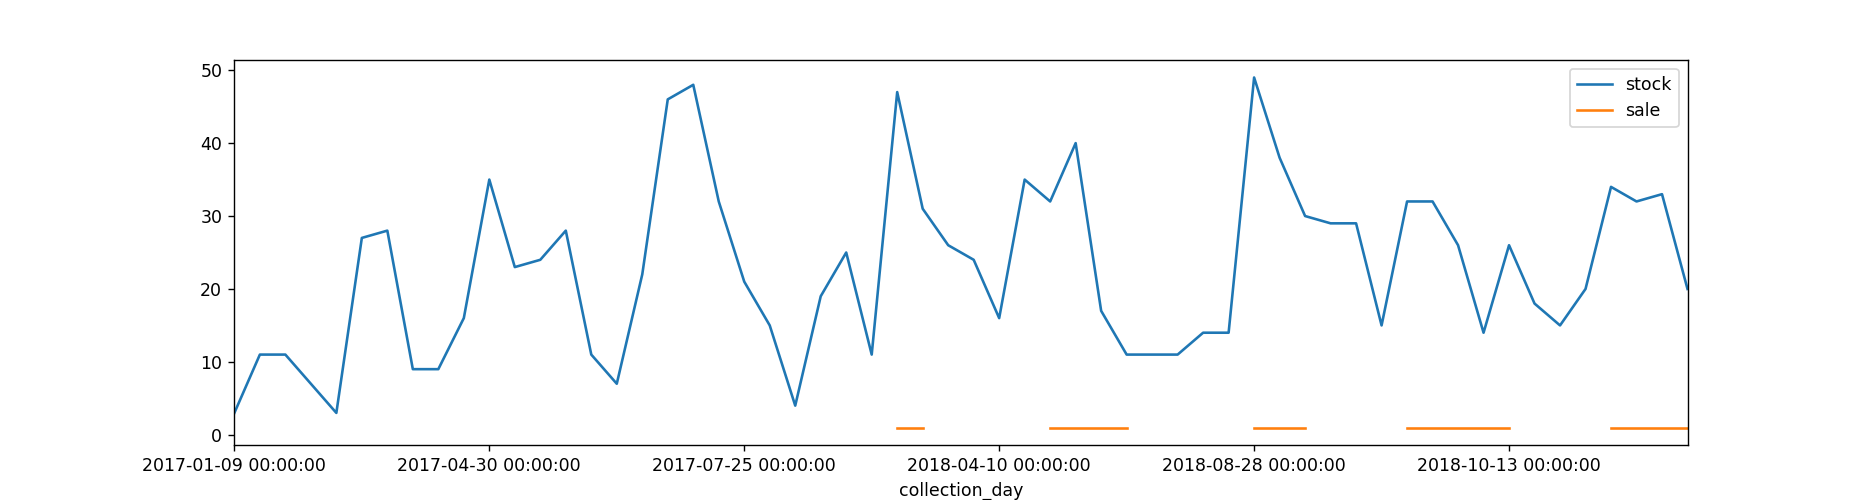

In [191]:
df_21 = df[df["store_id"] == 21].reset_index(drop=True)
df_21_8860 = df_21[df_21["product_id"] == 14593.0].reset_index(drop=True)
df_21_8860["sale"] = df_21_8860["promotion_price"].notna()
df_21_8860["sale"] = df_21_8860["sale"].astype(np.int32)
df_21_8860["sale"][df_21_8860["sale"] == 0] = None

df_21_8860.plot(figsize=(15,4), x="collection_day", y=["stock", "sale"], label="")

d:\jupyter\venv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


<IPython.core.display.Javascript object>


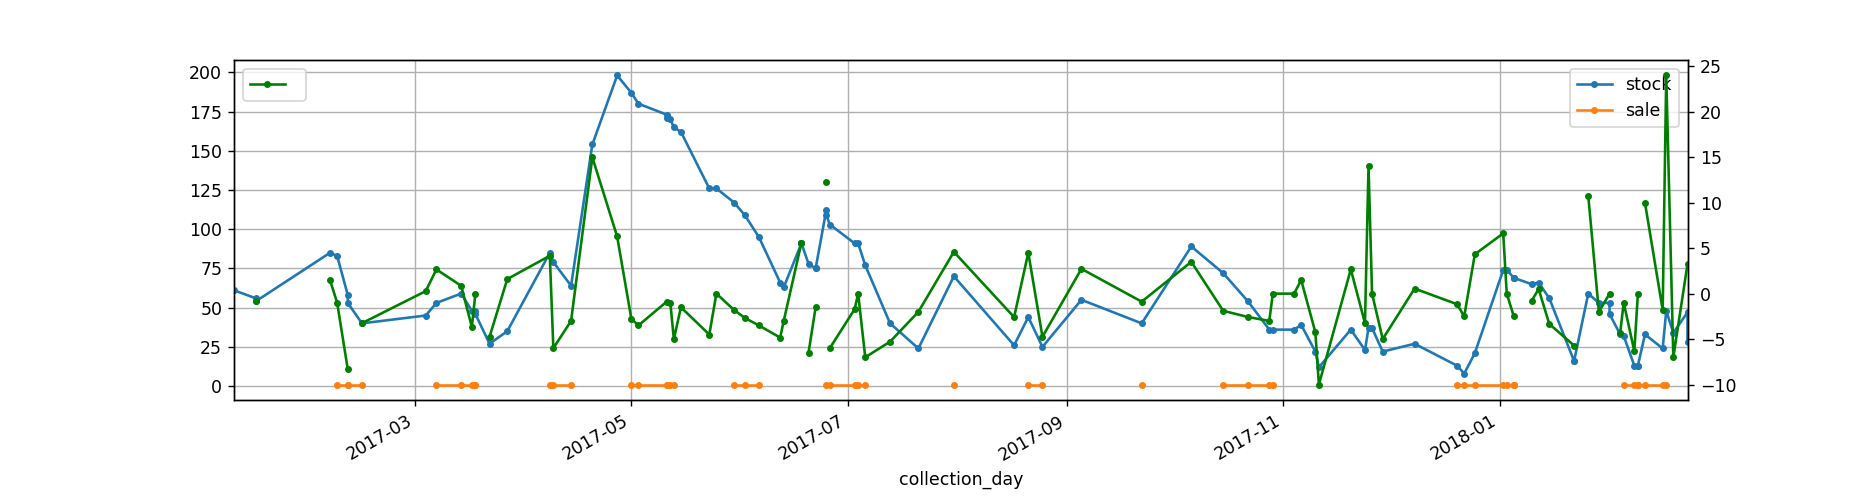

In [336]:
df_21 = df[df["store_id"] == 21].reset_index(drop=True)
df_21_redbull = df_21[df_21["category"] == "ЭНЕРГЕТИЧЕСКИЕ НАПИТКИ"].reset_index(drop=True)
df_21_redbull = df_21_redbull[df_21_redbull["product_name"] == "0,25Л РЕД БУЛЛ ЭНЕРГ НАПИТОК"].reset_index(drop=True)

df_21_redbull["sale"] = df_21_redbull["promotion_price"].notna()
df_21_redbull["sale"] = df_21_redbull["sale"].astype(np.int32)
df_21_redbull["sale"][df_21_redbull["sale"] == 0] = None
# df_21_redbull['collection_day'] = pd.to_datetime(df_21_redbull['collection_day'])
df_21_redbull["stock_diff"] = df_21_redbull["stock"].diff() / df_21_redbull['collection_day'].diff().dt.days
ax = df_21_redbull.plot(figsize=(15,4), x="collection_day", y=["stock", "sale"], label="", marker=".")
df_21_redbull.plot(ax=ax.twinx(),  x="collection_day", y="stock_diff", label="", marker=".", c="g")
# df_21_redbull.plot(ax=ax, x="collection_day", y=["stock_diff"], label="")
ax.grid(True)

In [341]:
df["category"].unique()

array(['МОЛОКО', 'БУМАЖНАЯ И ВАТНАЯ ПРОДУКЦИЯ',
       'ЗАМОРОЖЕННЫЕ ГОТОВЫЕ БЛЮДА', 'УХОД ЗА ЖИВОТНЫМИ',
       'МОЛОЧНЫЕ ПРОДУКТЫ', 'ЗАМОРОЖЕННЫЕ ОВОЩИ', 'СЛИВКИ',
       'ПРОФ БУМАЖНАЯ  ПРОДУКЦИЯ', 'ЗАМОРОЖЕННЫЕ ФРУКТЫ',
       'СОКИ/ НЕГАЗИРОВАННЫЕ НАПИТКИ', 'ВОДЫ', 'ТВОРОГ',
       'ЗАМОРОЖЕННЫЙ КАРТОФЕЛЬ', 'ОДНОРАЗОВЫЕ ПРИНАДЛЕЖНОСТИ',
       'БУМАЖНЫЕ САЛФЕТКИ', 'КОНСЕРВИРОВАННЫЕ ОВОЩИ',
       'ЖЕНСКАЯ КОСМЕТИКА И ГИГИЕНА', 'ГАЗ. Б/АЛКОГОЛ. НАПИТКИ',
       'ВАРЕНАЯ ВЕТЧИНА', 'КОНСЕРВИР. РЫБА/МОРЕПРОД.', 'БРЫНЗА',
       'ХОЛОДНЫЕ СОУСЫ', 'КОНСЕРВИРОВАННЫЙ ТУНЕЦ', 'МОЦАРЕЛЛА',
       'МЯГКИЙ ГОЛУБОЙ СЫР', 'ПОЛУМЯГКИЙ/ ПОЛУТВЕРДЫЙ',
       'ОХЛАЖДЕННЫЕ ГОТОВЫЕ БЛЮДА', 'ВАРЕНАЯ КОЛБАСА',
       'МЯГКИЙ ЗРЕЛЫЙ СЫР', 'СЛИВОЧНОЕ МАСЛО', 'МОРОЖЕНОЕ',
       'СУШЕНАЯ КОЛБАСА', 'ЗАМОРОЖЕННЫЙ ХЛЕБ', 'ЗАМОРОЖЕННАЯ ВЫПЕЧКА',
       'ПЛАВЛЕНЫЙ СЫР', 'ЛИЧНАЯ ГИГИЕНА', 'КОПЧЕНАЯ КОЛБАСА',
       'СОУСЫ/ ФОНД', 'ПРОЧИЕ МЯГКИЕ СЫРЫ', 'ПРОФЕССИОНАЛЬНАЯ КОСМЕТИКА',
       'ДЕТСКОЕ ПИТАНИЕ МОЛОЧН

In [334]:
# df['starts_at'] = pd.to_datetime(df['starts_at'])
df["starts_at"].diff()[0:10000].plot()




ValueError: view limit minimum 0.0 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [299]:
def to_integer(dt_time):
    return 365*dt_time.year + 100*dt_time.month + dt_time.day
to_integer(df_21_redbull.at[0, 'collection_day'])

20170109

In [301]:
type(df_21_redbull.at[0, 'collection_day'].year)

int

In [61]:
print(time(12, 30))
print(type(df.at[0, "starts_at"]))
print(type(time(3, 0)))

12:30:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'datetime.time'>


In [85]:
import numpy as np
# df["promotion_price"] != None
df["promotion_price"] == np.nan

0          False
1          False
2          False
3          False
4          False
           ...  
3999995    False
3999996    False
3999997    False
3999998    False
3999999    False
Name: promotion_price, Length: 4000000, dtype: bool

,index,Unnamed: 0,department,product_name,quantity,category,package_type,not_found,store_id,stock,brand,collection_day,product_id,city,promotion_price,regular_price,completed_at,starts_at,order_identifier,shopper_login
17,2146409,2146409,КОСМЕТИКА,380МЛ ЧИСТ/ЛИНИЯ ОПОЛАСК КРАПИ,0,ЛИЧНАЯ ГИГИЕНА,ШТУКА,1,14,113.0,PURE LINE,2017-01-09 00:00:00,100622.0,1,52.712,81.701,2017-01-09 12:53:00,2017-01-09 18:00:00,338753,NaN
18,2146387,2146387,КОСМЕТИКА,ШАМПУНЬ ЧЛ УКР.КРАПИВА 400МЛ,1,ЛИЧНАЯ ГИГИЕНА,ШТУКА,1,14,337.0,CHISTAYA LINIA,2017-01-09 00:00:00,29782.0,1,52.712,81.701,2017-01-09 12:53:00,2017-01-09 18:00:00,338753,NaN
42,541915,541915,ДЕЛИКАТЕСЫ И СЫР,372Г М-З ПРОВ СМЕТАН РЯБА 67%,2,СОУСЫ/ ФОНД,ШТУКА,0,11,51.0,РЯБА,2017-01-09 00:00:00,20204.0,1,35.927,53.396,2017-01-09 11:18:00,2017-01-09 15:00:00,338603,NaN
44,541892,541892,ДЕЛИКАТЕСЫ И СЫР,330Г СИРТАКИ ДЛ.ГР.САЛ CLASSIC,1,БРЫНЗА,ШТУКА,0,11,205.0,СИРТАКИ,2017-01-09 00:00:00,20302.0,1,92.321,133.235,2017-01-09 14:46:00,2017-01-09 19:00:00,338859,NaN
46,541875,541875,ДЕЛИКАТЕСЫ И СЫР,400Г МОРКОВЬ ОСТР ПО-КОРЕЙСКИ,1,ОХЛАЖДЕННЫЕ ГОТОВЫЕ БЛЮДА,ШТУКА,0,12,28.0,ГРИН КРЕСТ,2017-01-09 00:00:00,20089.0,1,56.519,67.661,2017-01-09 16:22:00,2017-01-09 21:00:00,338986,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999983,1089159,1089159,КОЛБАСНЫЕ ИЗДЕЛИЯ,530Г СОСИСКИ МОЛОЧНЫЕ КМК Ц/О,1,СОСИСКИ / САРДЕЛЬКИ,ШТУКА,1,87,85.0,КЛИНСКИЙ,2019-01-08 00:00:00,4443.0,17,157.778,206.054,2018-12-25 22:10:00,2019-01-08 19:00:00,1823568,4556
3999986,979629,979629,КОЛБАСНЫЕ ИЗДЕЛИЯ,550Г БУЖАНЕ КЛИН,1,МЯСНЫЕ ДЕЛИКАТЕСЫ,ШТУКА,0,87,32.0,КЛИНСКИЙ,2019-01-08 00:00:00,16048.0,17,227.393,387.890,2018-12-25 22:10:00,2019-01-08 19:00:00,1823568,4556
3999990,125818,125818,БЕЗАЛКОГОЛЬНЫЕ НАПИТКИ,1Л СОК РИЧ ЯБЛОЧНЫЙ,2,СОКИ/ НЕГАЗИРОВАННЫЕ НАПИТКИ,ШТУКА,0,87,148.0,RICH,2019-01-08 00:00:00,2321.0,17,60.335,119.321,2018-12-25 22:10:00,2019-01-08 19:00:00,1823568,4556
3999993,2146077,2146077,КОСМЕТИКА,8Р ZEWA Т/БУМ DELUX 3СЛ ПЕРСИК,2,БУМАЖНАЯ И ВАТНАЯ ПРОДУКЦИЯ,УПАКОВКА,0,21,1816.0,ZEWA,2019-01-10 00:00:00,7373.0,1,107.387,152.387,2018-12-28 10:50:00,2019-01-10 11:00:00,1938292,3221


In [95]:
df["promotion_price"].head(40)

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13       NaN
14       NaN
15       NaN
16       NaN
17    52.712
18    52.712
19       NaN
20       NaN
21       NaN
22       NaN
23       NaN
24       NaN
25       NaN
26       NaN
27       NaN
28       NaN
29       NaN
30       NaN
31       NaN
32       NaN
33       NaN
34       NaN
35       NaN
36       NaN
37       NaN
38       NaN
39       NaN
Name: promotion_price, dtype: float64

## Average Price calculation


In [455]:
s = 0
n = 0
for id_order, group in df.groupby("order_identifier"):
    s += (group["regular_price"] * group["quantity"]).sum()
    n += 1
s/n

4518.169760249664

In [450]:
df.head()

,department,product_name,quantity,category,package_type,not_found,store_id,stock,brand,collection_day,product_id,city,promotion_price,regular_price,completed_at,starts_at,order_identifier,shopper_login,Y_predicted
0,МОЛОЧНЫЕ,"1Л УП/МОЛОКО RIOBA 3,5% БЗМЖ",1,МОЛОКО,ШТУКА,0,14,1525.0,RIOBA,2017-01-09,9959.0,1,NaN,57.950,2017-01-09 07:26:00,2017-01-09 11:00:00,338528,NaN,0.089713
1,КОСМЕТИКА,24ШТ ARO Т\БУМАГА 120ГР ВТУЛКА,1,БУМАЖНАЯ И ВАТНАЯ ПРОДУКЦИЯ,УПАКОВКА,0,14,26.0,ARO,2017-01-09,10055.0,1,NaN,113.516,2017-01-09 07:26:00,2017-01-09 11:00:00,338528,NaN,0.060064
2,КОСМЕТИКА,20ШТ FL ВЛ.САЛФ Д/ИНТИМ.ГИГ,3,БУМАЖНАЯ И ВАТНАЯ ПРОДУКЦИЯ,УПАКОВКА,0,12,243.0,FINE LIFE,2017-01-09,30370.0,1,NaN,11.141,2017-01-09 05:42:00,2017-01-09 11:00:00,338513,NaN,0.060064
3,ЗАМОРОЗКА,2КГ ВАРЕНИКИ С ТВОРОЖ/НАЧ. MC,1,ЗАМОРОЖЕННЫЕ ГОТОВЫЕ БЛЮДА,ШТУКА,0,14,25.0,HORECA SELECT,2017-01-09,44736.0,1,NaN,289.502,2017-01-09 07:26:00,2017-01-09 11:00:00,338528,NaN,0.120235
4,КОНСЕРВЫ,5Л НАПОЛНИТЕЛЬ ВПИТ ARO,1,УХОД ЗА ЖИВОТНЫМИ,ШТУКА,1,12,101.0,ARO,2017-01-09,63623.0,1,NaN,65.600,2017-01-09 05:42:00,2017-01-09 11:00:00,338513,NaN,0.117865
